<a href="https://colab.research.google.com/github/kio15978/machine-learning/blob/main/01_K_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%98%EC%97%AC_%EB%8F%84%EB%AF%B8%EC%99%80_%EB%B9%99%EC%96%B4_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



# **unit. 01 마켓과 머신러닝**


# **생선 분류 문제**

특성 : 데이터의 특징

ex) 길이, 무게

## **도미 데이터 준비**

In [2]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,    #길이
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,    #무게
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

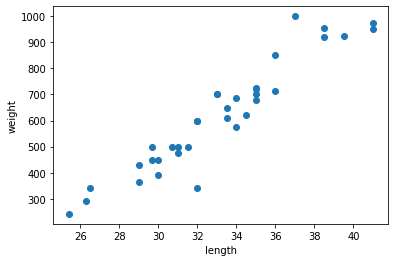

In [4]:
import matplotlib.pyplot as plt  # matplotlib의 pyplot 함수를 plt로 줄여서 임포트
plt.scatter(bream_length,bream_weight)
plt.xlabel('length')  # x축 = 길이
plt.ylabel('weight')  # y축 = 무게
plt.show()

## **빙어 데이터 준비**

In [5]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

## **도미, 빙어 한 그래프로 그리기**

*  2개의 산점도 한 그래프로 그리기 : scatter( )함수 연달아 사용

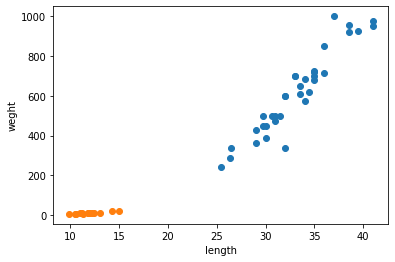

In [6]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weght')
plt.show()

주황색 : 빙어  / 파란색 : 도미

# **k-최근접 이웃 **
# **K-Nearest Neighbors**

**도미와 빙어 데이터 하나로 합치기**

In [24]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

length = 도미 35개 길이 + 빙어 14개 길이 = 도미, 빙어 길이 총 39개

weight = 도미 35개 무게 + 빙어 14개 무게 = 도미, 빙어 무게 총 39개


## **사이킷런 사용을 위해 각 특성의 리스트를 세로 방향으로 늘어뜨린 2차원 리스트 만들기**

-> zip함수와 리스트 내포 구문 사용

* zip( ) : 두 그룹의 데이터를 서로 엮어줌

나열된 리스트 각각에서 하나씩 원소를 꺼내 반환

* for( ) 동일한 작업을 계속 반복

In [25]:
fish_data = [[l,w] for l,w in zip(length, weight)]

for문 zip( )함수로 length와 weight 리스트에서 원소를 하나씩 꺼내 l과 w에 할당

그러면 [ l, w]가 하나의 원소로 구성된 리스트로 만들어짐

## **정답 부여**


곱셈 연산자를 사용 파이썬 리스트 반복

찾으려는 대상 : 1

그 외 : 0



In [26]:
fish_target = [1]*35 + [0]*14

## **KNeighborsClassifier 임포트**

* KNeighborsClassifier : 사이킷런 패키지의 K-최근접 이웃 알고리즘 구현 클래스

* 패키지나 모듈 전체를 임포트하지 않고 특정 클래스만 임포트하려면 from ~ import구문 사용

In [27]:
from sklearn.neighbors import KNeighborsClassifier

## **임포트한 클래스의 객체 생성**

In [28]:
kn = KNeighborsClassifier()

## **훈련**

모델에 데이터를 전달하여 규칙을 학습하는 과정

* fit( ) : 주어진 데이터로 알고리즘 훈련

In [30]:
kn.fit(fish_data,fish_target)

KNeighborsClassifier()

## **평가**

* score( ) : 모델을 평가, 0~1 사이 값 반환

In [31]:
kn.score(fish_data, fish_target)

1.0

## **예측**

* predict( ) : 새로운 데이터의 정답 예측

리스트의 리스트를 전달해야 함 -> 예측 값을 리스트로 2번 감싸자  -> .predict[ [예측값] ]

In [33]:
kn.predict([[30,600]])

array([1])

## **_fit_X 속성에 전달한 fish_data 가짐**



In [34]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


## **_y 속성에 fish_target 가짐**

In [35]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


K-최근접 이웃 알고리즘은 무언가 훈련되는 게 없는 셈

fit( ) 메서드에 전달한 데이터를 모두 저장하고 있다가 새로운 데이터가 등장하면 가장 가까운 데이터를 참고하여 구분

KNeighborsClassifier 클래스의 기본값 = 5

기준은 n_neighbors 매개변수로 변경 가능

## **참고 데이터를 49개로 한 모델**

In [36]:
kn49 = KNeighborsClassifier(n_neighbors=49)

In [37]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

가장 가까운 49개 데이터 사용하는 k-최근접 이웃 모델에 fish_data를 적용하면 fish_data에 있는 모든 생선을 사용하여 예측하게 됨 => fish_data의 49개 중 35개가 도미, 14개가 빙어로, 도미가 다수를 차지함 => 어떤 데이터를 넣어도 무조건 도미로 예측

In [38]:
print(35/49)

0.7142857142857143




---

